In [ ]:
#@title Exercice 4.1

def factoriel(n):
    if n == 0 or n == 1:
        return 1
    else:
        return n * factoriel(n-1)

print(factoriel(6))

720


In [33]:
#@title Exercice 4.2

def applatir_listes_recursif(liste_listes, liste_fusionnee):
    for element in liste_listes:
        if type(element) is list:
            applatir_listes_recursif(element, liste_fusionnee)
        else:
            liste_fusionnee.append(element)

def applatir_listes(liste_listes):
    liste_fusionnee = []
    applatir_listes_recursif(liste_listes, liste_fusionnee)
    return liste_fusionnee

la_liste = [1,2,[3,4],[[5, 6],[[7,8],[9,10]]],11,[12,13],[14,15,[16,[17]],18,[[ ]],19,[ ]], 20]

print(applatir_listes(la_liste))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [34]:
#@title Exercice 4.3

def recherche_recursive(elements, gauche, droite, cible):
    if gauche > droite:
        return False
    milieu = (gauche + droite) // 2
    if elements[milieu] == cible:
        return True
    elif elements[milieu] > cible:
        return recherche_recursive(elements, gauche, droite -1, cible)
    else:
        return recherche_recursive(elements, gauche + 1, droite, cible)

def recherche_dichotomique(elements, cible):
    return recherche_recursive(elements, 0, len(elements) - 1, cible)

elements = list(range(1, 15, 2))
print(recherche_dichotomique(elements, 13))
print(recherche_dichotomique(elements, 2))


True
False


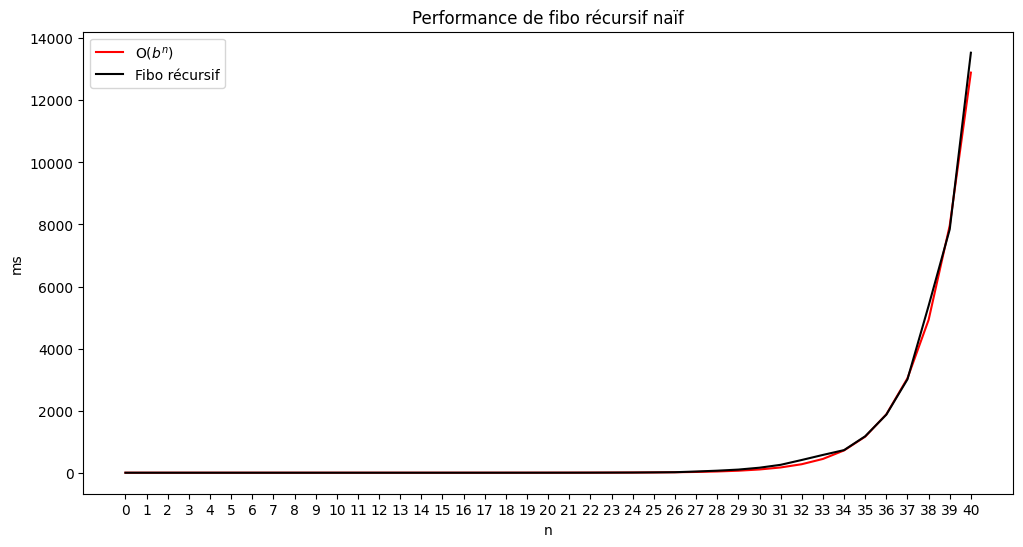

In [ ]:
#@title Exercice 4.4
import matplotlib.pyplot as plt
import timeit
import numpy as np

FACTEUR_MUL = 1000
BASE = 1.618

def fibo_recursif_naif(n):
    if n <= 1:
        return n
    else:
        return fibo_recursif_naif(n-2) + fibo_recursif_naif(n - 1)

temps_base = timeit.timeit(lambda: fibo_recursif_naif(0), number=1000) / 1000

valeurs_n = list(range(41))
y_bn = [0]      # Pour que le premier point soit 0,0
y_fibo = [0]

for i in range(1, len(valeurs_n)):
    n = valeurs_n[i]
    y_bn.append(temps_base * BASE**n  * FACTEUR_MUL)
    temps_fibo = timeit.timeit(lambda: fibo_recursif_naif(n), number=1)
    y_fibo.append(temps_fibo  * FACTEUR_MUL)

plt.figure(figsize=(12, 6))

plt.title("Performance de fibo récursif naïf")
plt.xlabel("n")
plt.ylabel("ms")

plt.xticks(ticks=valeurs_n)
plt.plot(valeurs_n, y_bn, "-r", label=f"O($b^n$)")
plt.plot(valeurs_n, y_fibo, "-k", label=f"Fibo récursif")

plt.legend()
plt.show()


In [35]:
#@title Exercice 4.5

def sous_ensemble_somme(elements, n, somme):
    if somme == 0:
        return True
    if n == 0:
        return False
    if elements[n-1] > somme:
        return sous_ensemble_somme(elements, n-1, somme)
    else:
        return sous_ensemble_somme(elements, n-1, somme - elements[n-1]) or sous_ensemble_somme(elements, n-1, somme)


def sous_ensemble_somme_dynamique(elements, n, somme, matrice):
    if somme == 0:
        return True
    if n == 0:
        return False
    if elements[n-1] > somme:
        return sous_ensemble_somme_dynamique(elements, n-1, somme, matrice)
    else:
        # C'est ici que ça change. Si on peut déjà soustraire un résultat calculé, on le fait
        if matrice[somme][n-1] is not None:
            return matrice[somme][n-1]
        else:
            cote_gauche = sous_ensemble_somme_dynamique(elements, n-1, somme - elements[n-1], matrice)
            cote_droit = sous_ensemble_somme_dynamique(elements, n-1, somme, matrice)
            matrice[somme - elements[n-1]][n-1] = cote_gauche
            matrice[somme][n-1] = cote_droit
            return cote_gauche or cote_droit





liste = [4, 8, 12, 16, 10]

somme = 18
ligne = [None] * len(liste)
matrice = [ligne] * (somme+1)
print(sous_ensemble_somme_dynamique(liste, len(liste), somme, matrice))

somme = 21
ligne = [None] * len(liste)
matrice = [ligne] * (somme+1)
print(sous_ensemble_somme_dynamique(liste, len(liste), somme, matrice))


# print(sous_ensemble_somme(liste, len(liste), 18))
# print(sous_ensemble_somme(liste, len(liste), 21))

True
False
